Collections — High Level Photometry Objects
=======================
---

The "_collections_" directory gather the higher level instance that inherite from lower level collections, such as _PhotoPointCollection_. We here details the various high level photometric collection instances that can be summarized using the the three following concepts:
* Collection of Photopoints at various **wavelength** (Spectral Energy Distribution) -> "_photospectral.py_" (dev)
* Collection of Photopoints at various **epochs** (Light Curves) -> "_phototemporal.py_" (dev)
* Collection of Photopoints at various **positions** (PhotoMaps) -> "_photospatial.py_"

All of these advanced collections inherite from _PhotoPointCollection_. Let's thus start by discussing this mid-level instance. 

But first, let's do the basic imports.

In [2]:
# Basic import
## plot within the notebook
%matplotlib inline
import warnings
import numpy as np
## No annoying warnings
warnings.filterwarnings('ignore')
# - Astrobject Modules
import astrobject as a

***
# PhotoPointCollection
***
The _PhotoPointCollection_ is collection of photopoints. Its has no fundamental parameters, each of is photopoint being considered as an unique _source_ by the collection.

**To _create_ a photopointcollection you need a list of individual photopoints and that's it !**

You can also provide an _id_ for each of these photopoints (it is recommanded) but if you don't an _id_ will automatically be generated from the _photopoint_'s _bandname_ (a number will then be added if several have the same name).
***

   **example**:

    Let's create 6 artifical photopoints that will then be merged into a PhotoPointCollection. 

    In this example each Photopoints will be sdss bands (u,gx2,r,i,z) with various observation times (mjd). 
    In a first  step we won't provide them _ids_ to see the automatic formating.

    Remark that when loading a photopoint, if the bandname is known by sncosmo, no need to provide a 
    wavelength, sncosmo BandPass will retreive it. 
    However, if you did provided one, then this one will be used.

In [2]:
# - Let's create the artificial photopoints
ppoint_A = a.get_photopoint(lbda=3578,flux=20,var=5.0, bandname="toto", mjd=55300)
ppoint_B = a.get_photopoint(lbda=None,flux=10,var=1.2, bandname="sdssg", mjd=55480)
ppoint_C = a.get_photopoint(lbda=None,flux=30,var=2.9, bandname="sdssg", mjd=55310)
ppoint_D = a.get_photopoint(lbda=None,flux=12,var=1.0, bandname="sdssr", mjd=55550)
ppoint_E = a.get_photopoint(lbda=None,flux=25,var=2.5, bandname="sdssi", mjd=55340)
ppoint_F = a.get_photopoint(lbda=None,flux=12,var=2.2, bandname="sdssz", mjd=55200)
ppoint_list = [ppoint_A,ppoint_B,ppoint_C,ppoint_D,ppoint_E,ppoint_F]

In [3]:
# - Let's create a PhotoPointCollection
pcollection = a.collection.PhotoPointCollection(photopoints= ppoint_list)

In [4]:
# - Let's see how each individual photopoints have been labeled
print pcollection.list_id

['sdssg', 'sdssg-1', 'sdssi', 'sdssr', 'sdssz', 'toto']


### The _get()_ method

The _PhotoPointCollection_ has methods to quickly access all the information in the individual photopoints:

* _get(key)_: The methods enables to call the get() method of the PhotoPoint following the list_id sorting. e.g. get('flux') will return a list of flux following the list_id photopoints sorting.

* _data_: This property will call the get() methods for each photopoint data information with _id_ first: (id,flux,fluxvar,lbda,mjd,bandname,zp,zpsys)

* _meta_: Like _data_ but for the photopoint meta information if any (returns None if no meta information, see metakeys)

In addition, for ease of use, a list of properties has been predifined that makes use of the get() methods:

* _lbdas_: is a self.get('lbda')
* _bandnames_: is a self.get('bandname')
* etc for _fluxes_ ('flux'), _mjds_ ('mjd') ...

**Tip**: You can mask ids using the `mask` option, if so, the `list_id[mask]` will be used instead of `list_id`
***
    In the former example, the lbda of the objects are consequently:

In [5]:
pcollection.get("lbda")

array([ 4717.59977746,  4717.59977746,  7506.23808032,  6186.79996975,
        8918.30148441,  3578.        ])

In [6]:
# or because it has been predifined
pcollection.lbdas

array([ 4717.59977746,  4717.59977746,  7506.23808032,  6186.79996975,
        8918.30148441,  3578.        ])

**_Remark_**: the lbda here have been retrived (except for 'toto') thanks to sncosmo as it knows the sdss bands.

To access the data as an astropy table, simply use _data_ property:

In [7]:
print pcollection.data

   id   flux var      lbda      mjd  bandname  zp  zpsys
------- ---- --- ------------- ----- -------- ---- -----
  sdssg 10.0 1.2 4717.59977746 55480    sdssg None    ab
sdssg-1 30.0 2.9 4717.59977746 55310    sdssg None    ab
  sdssi 25.0 2.5 7506.23808032 55340    sdssi None    ab
  sdssr 12.0 1.0 6186.79996975 55550    sdssr None    ab
  sdssz 12.0 2.2 8918.30148441 55200    sdssz None    ab
   toto 20.0 5.0        3578.0 55300     toto None    ab


### I/O of PhotoPointCollection: the _writeto()_ and _load()_ methods

There is easy-to-use I/O methods in _PhotoPointCollection_ that makes use of the astropy table _write()_ and _read()_ methods. 

* _writeto(filename)_: this methods combines _data_ and _meta_ properties (if any meta) into a unique astropy Table and write the table into 'filename' (see formating options in _writeto_. 

* _load(filename)_: conterpart of _writeto()_, this methods enable to recover data saved as astropy table. This will recreate the individual photopoints to _create()_ the new instance. **Remark** that if the astropy table has comments, they will be red (potentially interested for built-in values, see PhotoMap)

***
    So let's save this table in "data/tmp_photopoint_table.dat" as an ascii file (default). Then let's create a 
    second _PhotoPointCollection_ 'pcollection2' that load the data from "data/tmp_photopoint_table.dat".

In [13]:
pcollection.writeto("data/tmp_photopoint_table.dat", format="ascii")

In [14]:
# The ascii format being default, no need to say it, but you could just add 'format=...' if it has any other form.
pcollection2 = a.collection.PhotoPointCollection(filein="data/tmp_photopoint_table.dat")
# - Alternative:
# pcollection2 = a.collection.PhotoPointCollection(empty=True)
# pcollection2.load("data/tmp_photopoint_table.dat")
# let's have a look at the data:
print pcollection2.data

   id   flux var      lbda      mjd  bandname  zp zpsys
------- ---- --- ------------- ----- -------- --- -----
  sdssg 10.0 1.2 4717.59977746 55480    sdssg  --    ab
sdssg-1 30.0 2.9 4717.59977746 55310    sdssg  --    ab
  sdssi 25.0 2.5 7506.23808032 55340    sdssi  --    ab
  sdssr 12.0 1.0 6186.79996975 55550    sdssr  --    ab
  sdssz 12.0 2.2 8918.30148441 55200    sdssz  --    ab
   toto 20.0 5.0        3578.0 55300     toto  --    ab


Let's remove the file to keep the 'data' directory clean

In [15]:
rm "data/tmp_photopoint_table.dat"

In [16]:
del pcollection2

### The useful <em>set_meta()</em> method

You may wish to add information on the flight to the photopoints. To do so, you can make use of the _meta_ properties of the photopoints that register any information. The information are then accessible for their _get()_ method.

The <em>set_meta(key, values)</em> method loops over the <em>list_id</em> to give all of the photopoints a value. The value will be recorded by the _key_ meta entry. _Values_ could have different format:

* a single float/int/string/etc.: Then this unique value will be assigned to all of the photopoints

* a 1-value list/array: same as above

* a _nsources_-list/array: following the <em>list_id</em> sorting, the i-th value will be set to the i-th photopoint. 

any other format (i.e. a wrong size list) will raise a ValueError

***
    Let's define a 'detection' array which simply is the detection level of the flux — flux/sqrt(variance).

In [17]:
# - let's create the detection array
detection = pcollection.get("flux") / np.sqrt(pcollection.get("var"))
# - strictly equivalent to the predefined:
# detection = pcollection.fluxes / np.sqrt(pcollection.fluxvars)

In [18]:
pcollection.set_meta("detection",detection)

In [19]:
# and let's see to meta key of the photopoint labeled 
pcollection.photopoints['toto'].meta

{'detection': 8.9442719099991592}

In [20]:
# or let's have a general look to all the photopoints meta:
print pcollection.meta

   id     detection  
------- -------------
  sdssg 9.12870929175
sdssg-1 17.6166065854
  sdssi 15.8113883008
  sdssr          12.0
  sdssz 8.09039834956
   toto    8.94427191


### Some ploting methods: _show()_ and <em>show_hist()</em>

Two ploting methods have been implemented in the mid-level _PhotoPointCollection_ class: 

* <em>show_hist()</em>: enables to easily display an histogram of whatever you can access with _get()_ ; you can  select the photopoints you want thanks to a `mask` option (see _get()_ method).

* _show(`mode`)_: a basic ploting function to see sed-like plot (flux vs. lbda `mode='sed'`) or lightcurve-like plot (flux vs. mjd `mode='lightcurve'`). **Caution** most likely, this method will be overwrite by inheriting classes.

***
    To finish, let's look at the distribution of the detection of the few photopoints we have, and there non-sense sed

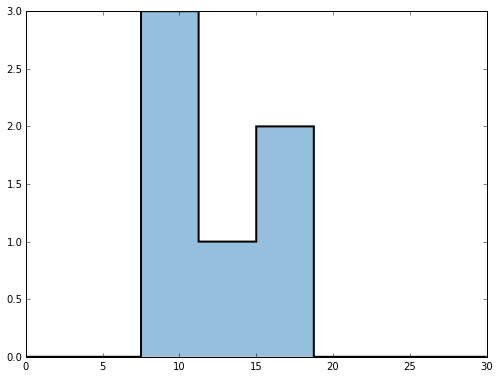

In [21]:
# the detection distribution, options goes to matpotlib hist:
pcollection.show_hist("detection", range=[0,30],bins=8)

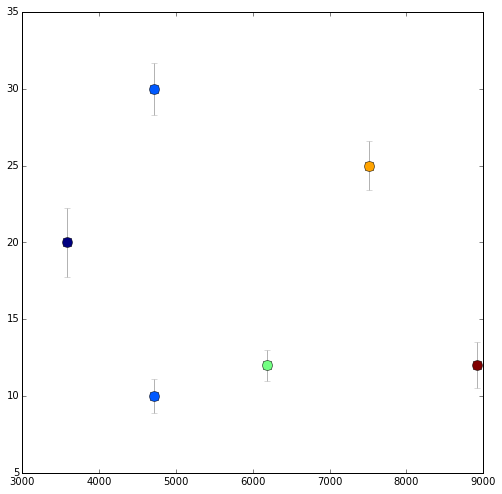

In [22]:
# the sed-like plot
pcollection.show("sed")

***
# PhotoMap: PhotoPointCollection + coordinates
***

A _PhotoMap_ is simply a _PhotoPointCollection_ for which the individual photopoint's _id_ are their coordinates. Coordinates can be given in world coordinate system (`ra,dec`) or in pixels (`x,y`). Because it has coordinates, a lot of other methods and information are now available. 

The main additions are the interactions of the _PhotoPointCollection_ with a catalogue as well as the Voronoy-tesselation ploting method.

### Create a PhotoMap

To explain how to use the PhotoMap, it is easier to have a concrete example. 

***
**example**

    We are going to load an image and get a PhotoPointCollection combining the flux of the stars of the image. 
    This will be a PhotoMap.
    First, let's create a sdss intrument instance, asserting it a catalogue and get the coordinates of the stars

In [3]:
# The sdss instrument
sdss = a.get_instrument("data/sdss_PTF10qjq_g.fits")

In [4]:
# The catalogue, which is a sdss one
cat = a.get_catalogue("data/sdss_PTF10qjq_catalogue.txt", "sdss")
# and assert it to the sdss object
sdss.set_catalogue(cat)
# and get the ra,dec of the stars
ra,dec = sdss.catalogue.get(["ra","dec"],mask=sdss.catalogue.get_mask(stars_only=True))

    Let's see how does this looks

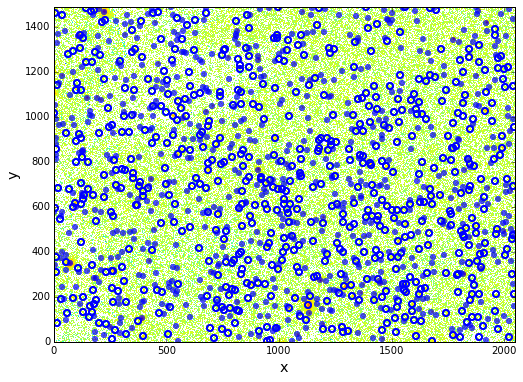

In [5]:
pl = sdss.show(show_catalogue=True)

    Now, nothing easier than getting the star's photomap

In [15]:
# the fluxes of the photopoints will be a 10 arcsec radius around the ra,dec coordinates ; 
# -> this coordinates being in wcs units (not pixels)
pmap = sdss.get_photopoint(ra,dec, radius=10, runits="arcsec", wcs_coords=True)

`pmap` is a _PhotoMap_, but what happened here ?

1. Thanks to the sep API, the counts and counts_err has been extracted (sep.extract, called through instrument's <em>get_aperture()</em>

2. The counts and errors has been converted in fluxes and variances using the instrument's <em>count_to_flux()</em> method

3. Because we requested several coordinates, a loop has been made over all the coordinates to create a list of photopoints. <br>
On the flight the `mjd`, `bandname`, `instrument_name` and `zp` have been transfered from the instrument to the individual photopoints<br>
-> This created `photopoints` which is simple a list of the individual _photopoint_

4. a.get_photomap(`photopoints`, `coords`, `wcs_coords=True`) has been called, and the `coords=radec` coordinates have been provided as photopoint's id

### Let's now have a look to the PhotoMap

The aforementioned _PhotoPointCollection_ methods and property still exist, and notably the _data_ astropy table. Here for instance, this is how it looks like:

Notice that 'id' actually has `"%.8f,%.8f"` coordinate format:

In [8]:
print pmap.data

           id                   flux               var        ...  zp  zpsys
------------------------ ------------------ ----------------- ... ---- -----
256.66963900,35.45969600 -6.00227712414e-18 1.12496280572e-35 ... 22.5    ab
256.67500500,35.44995900  5.40682993449e-18 1.14333804045e-35 ... 22.5    ab
256.67713200,35.44464900  1.88433109829e-17 1.17484306797e-35 ... 22.5    ab
256.67962700,35.43338800  3.53365816465e-16 1.48303012624e-35 ... 22.5    ab
256.67971900,35.47451200  5.68298969699e-17 1.04217530987e-35 ... 22.5    ab
256.68145700,35.45612800  1.71565144865e-16 1.52780987823e-35 ... 22.5    ab
256.68185100,35.47148800 -2.84138221975e-17  1.1182145953e-35 ... 22.5    ab
256.68432800,35.44779700 -3.17373642458e-18 1.12439741162e-35 ... 22.5    ab
256.68444000,35.43805100  4.04734135751e-16 2.07496097511e-35 ... 22.5    ab
256.68482400,35.43189800  8.18336305923e-17 1.31086641623e-35 ... 22.5    ab
                     ...                ...               ... ...  ...   ...

### Side connections: catalogue and wcs

* **wcs** The wcs solution enables to go from pixels to coords and the other way around. If you set a wcs solution to the PhotoMap this will enable to have access to this information. As usual, the <em>set_wcs()<\em> method does so. 

* **catalogue** Associating a catalogue with the photomap might enable to compare which points to known catalogue information. As usual, the <em>set_catalogue()</em> method enables to do so.


In our example, the sdss' instrument had a `wcs` solution and a `catalogue`. When called, the <em>get_photopoint()</em> that created our _PhotoMap_ (`pmap`) also asserted the instrument's `catalogue` and `wcs` to the _PhotoMap_.

***

    Let's check: 

In [9]:
pmap.has_catalogue(), pmap.has_wcs()

(True, True)

Good, both are there. If not we could have done:
    
    pmap.set_catalogue(sdss.catalogue, reset=True) 
    pmap.set_wcs(sdss.wcs)
    
In that case, the 'reset' option enables to remove the catalogue's masking (fov mask and matching if any). 
It is important to remove these information, notably the matching one, since the index of the photopoint's
photomap are not the same of whatever could have been matched in by the instrument.

### Interaction with WCS solution

When the photomap has been loaded, we said the given id-coordinate were `wcs_coords=True` (i.e. ra,dec). This information is saved in _wcsid property. 
Hence, the code knows that the id actually are `radec`, and because we have a wcs solution it also knows how to get `xy` pixels coordinates.

**Remark with I/O**: a small upgrade has been made in the _PhotoMap_ class in comparison to the _PhotoPointCollection_ conserning the _writeto()_ and load _methods()_. When you write, a comment is added to save the `_wcsid` value. When loading, the method will look for this comment to assert the good `_wcsid` value. If not wcs_coords is assumed, so be careful !

Then coordinates information are the following:

In [13]:
# Ra Dec, here from the id
pmap.radec 

array([[ 256.669639,   35.459696],
       [ 256.675005,   35.449959],
       [ 256.677132,   35.444649],
       ..., 
       [ 256.986797,   35.43021 ],
       [ 256.991475,   35.43482 ],
       [ 256.992209,   35.429821]])

In [14]:
# x,y image's pixel coordinates, here converted from ra,dec to pixel using the wcs solution
pmap.xy

array([[   52.70668834,    94.74250056],
       [   45.04228786,   191.46278484],
       [   35.67309997,   241.36460153],
       ..., 
       [ 1986.72432449,  1455.72146124],
       [ 2037.19149612,  1435.46418901],
       [ 2020.26662389,  1477.9834729 ]])

### Interaction with the catalogue

The first thing to do when having a catalogue is to match the instance's coordinates with existing values in the catalogue. The <em>match_catalogue()</em> method does just so. It has a `arcsec_size` option which tells the accepted coordinate discrepancy between the catalogue coordinates and the photomap's ones (2 arcsec is default). This method will fill the _catmatch_ property (which is an empty dictionnary otherwise). 

_catmatch_ is dictionnary having three entries:

* `angsep`: the angular distance in arcsec between the photomap coordinates and the catalogue ones
* `idx`: the index of the photomap's photopoint (following <em>list_id</em> sorting)
* `idx_catalogue`: the index of the catalogue. 

This way, the i-th idx's PhotoMap's photopoint correspond to the i-th idx_catalogue's catalogue entry.


In [20]:
pmap.match_catalogue()

Once the catalogue is matched, you have access to advanced masking tools: <em>get_mask()</em> and <em>get_index()</em>

* get_mask(): can have 3 entries `stars_only`[bool], `isolated_only`[bool], `catmag_range`[min,max]

* get_index(): calls <em>get_mask()</em> so has the same options and converts the bool-array into indexes corresponding to the `True` values. Set the option `cat_indexes` to `True` access the catalogue's corresponding indexes.

***
    For instance, you want the instrument's pixel coordinates of the stars within the catalogue magnitude rande [15,18]

In [34]:
mask = pmap.get_mask(stars_only=True, catmag_range=[15,18])
x,y = pmap.xy[mask].T

### Ploting Methods

We have access to the same ploting methods as _PhotoPointMap_ (since we inherate them). Here let's try use the <em>show_hist()</em> methods applying mask.
***
    Let's show the measuremed magnitude dispersion of the stars having a catalogue's mag range of 16 to 20

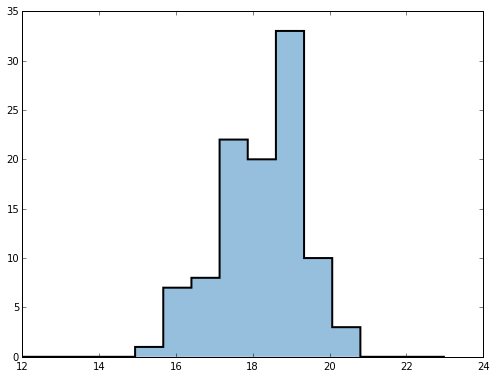

In [48]:
# Remark, histogram of the measured magnitude, the one in PhotoMap, hence extracted from the sdss instrument,
# while the masking is based on the catalogue's magnitudes.
pmap.show_hist(toshow="mag", 
               mask= pmap.get_indexes(stars_only=True, catmag_range=[16,20]), 
               range=[12,23],bins=15)

#### The Voronoy mapping

Let's show the same things overplotted on the sdss' instrument _show()_

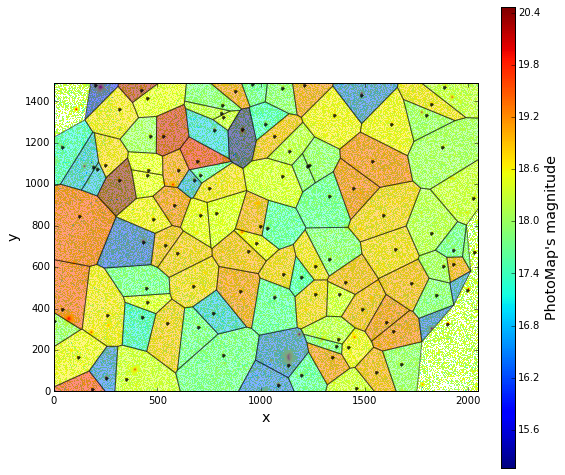

In [47]:
# because of ipython notebook, don't show 
# set wcs_coords to False since the image is plotted in pixels axes
pl = sdss.show(show=False)
plv = pmap.display_voronoy(ax=pl['ax'], toshow="mag", wcs_coords=False, 
                    mask = pmap.get_indexes(stars_only=True, catmag_range=[16,20]),
                    show_nods=True, cblabel="PhotoMap's magnitude")

The black points show the nods (i.e. the location of the requested objects) and the color of the patches represent the measured magnitude of the objects (see legend). 